## Exemplo do DFT

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
plt.style.use('seaborn-poster')
%matplotlib inline

/tmp/ipykernel_11506/4173799546.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [19]:
def DFT(x):
    """
    Function to calculate the
    discrete Fourier Transform
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)

    X = np.dot(e, x)

    return X

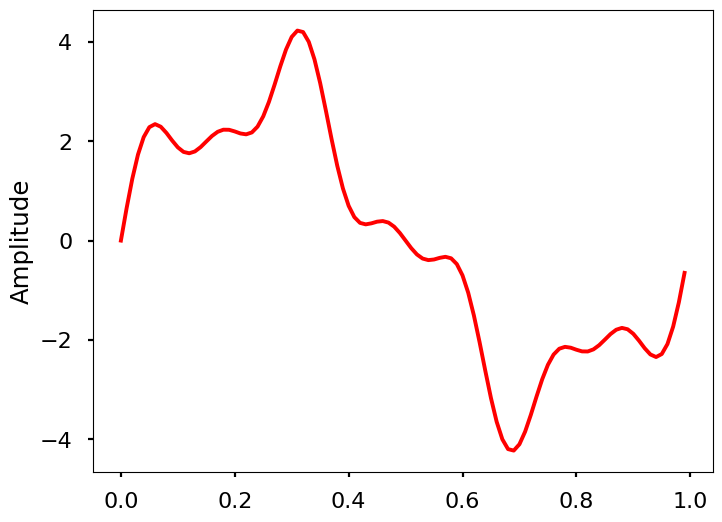

In [20]:
##Sinal de exemplo

sr = 100
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

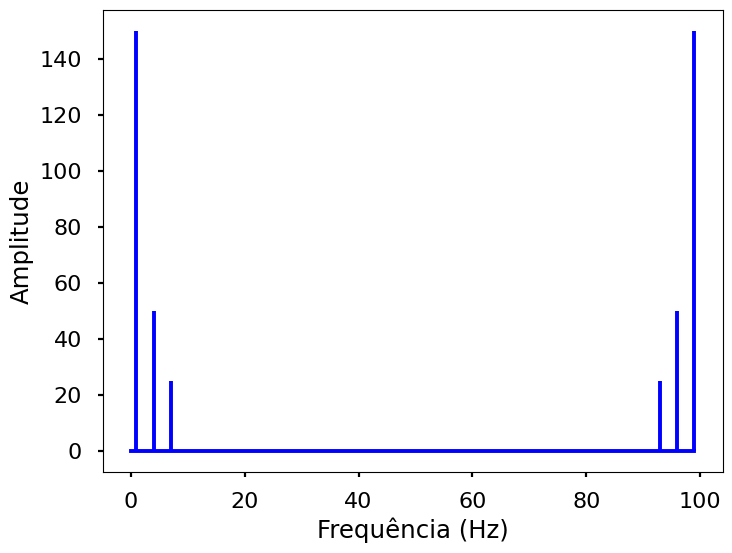

In [21]:
## Geracao do espectro de frequencia do sinal x[n]

X = DFT(x)

N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.ylabel("Amplitude")
plt.xlabel("Frequência (Hz)")
plt.show()

## Exemplo de DFS com a biblioteca do numpy

<BarContainer object of 50 artists>

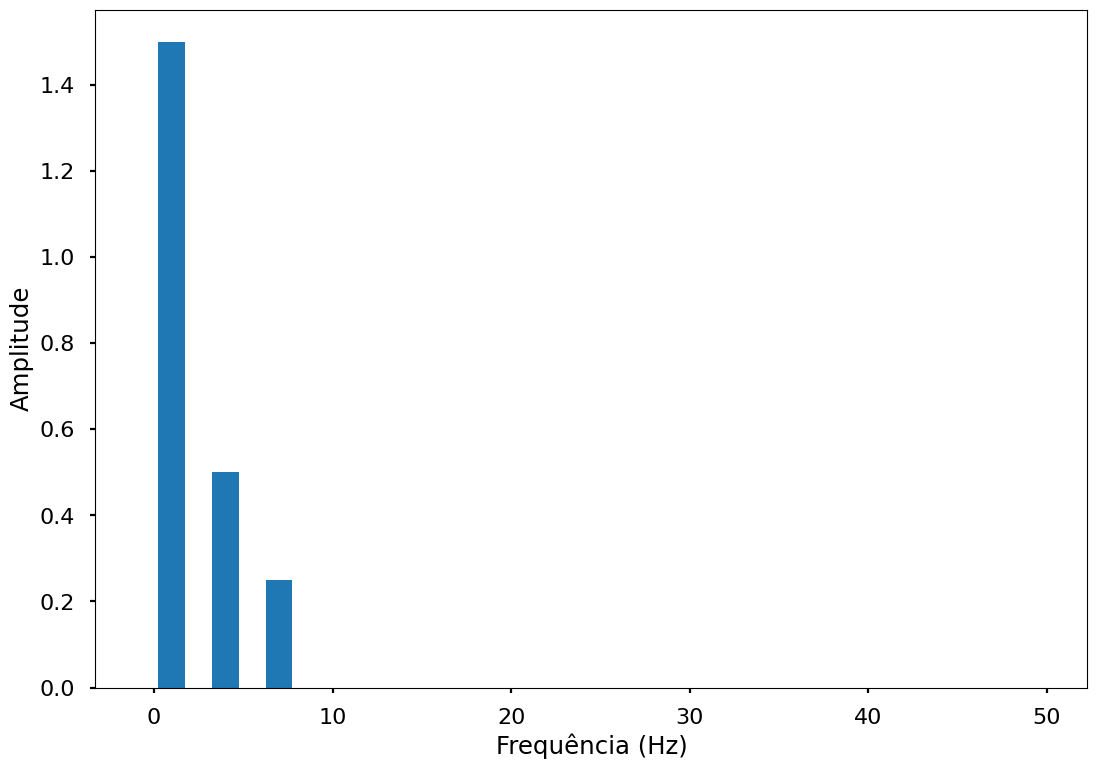

In [22]:
fft = np.fft.fft(x)
T = t[1] - t[0]
N = x.size
f = np.fft.fftfreq(len(x), T)
frequencias = f[:N // 2]
amplitudes = np.abs(fft)[:N // 2] * 1 / N
plt.ylabel("Amplitude")
plt.xlabel("Frequência (Hz)")
plt.bar(frequencias, amplitudes, width=1.5)

## Filtro IIR

In [23]:
np.random.seed(42)
fs = 30  # Frequencia de 30hz
ts = np.arange(0, 5, 1.0 / fs)  # time vector - 5 seconds
ys = np.sin(2*np.pi * 1.0 * ts)  # sinal sem ruido
yerr = 0.5 * np.random.normal(size=len(ts))  # sinal com ruido
yraw = ys + yerr

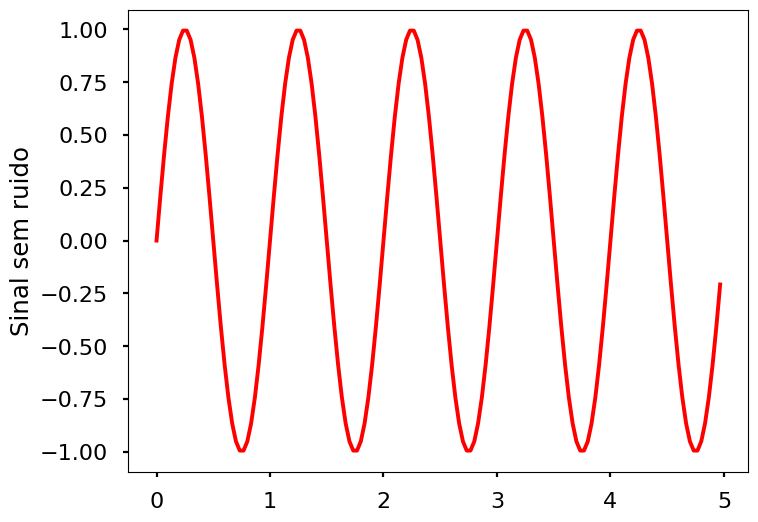

In [24]:
plt.figure(figsize = (8, 6))
plt.plot(ts, ys, 'r')
plt.ylabel('Sinal sem ruido')

plt.show()

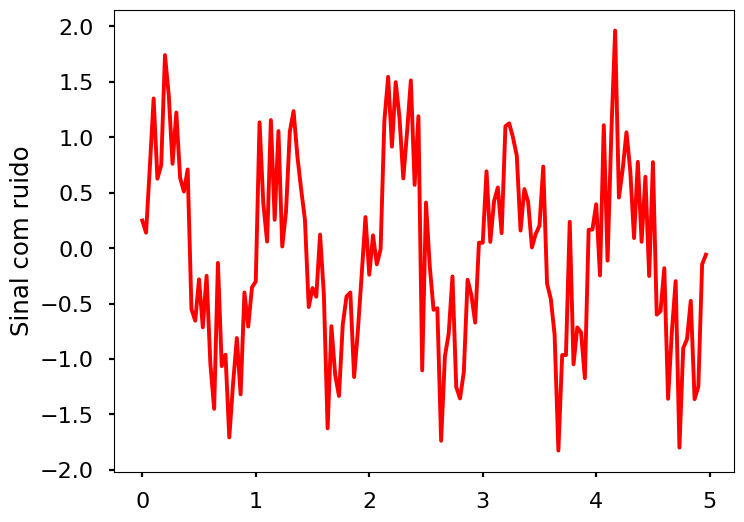

In [25]:
plt.figure(figsize = (8, 6))
plt.plot(ts, yraw, 'r')
plt.ylabel('Sinal com ruido')

plt.show()

In [26]:
## Agora iremos passar o filtro no sinal com ruido
b, a = scipy.signal.iirfilter(4, Wn=2.5, fs=fs, btype="low", ftype="butter")
print(b, a, sep="\n")
y_lfilter = scipy.signal.lfilter(b, a, yraw)

[0.00257643 0.01030574 0.01545861 0.01030574 0.00257643]
[ 1.         -2.63862774  2.76930979 -1.33928076  0.24982167]


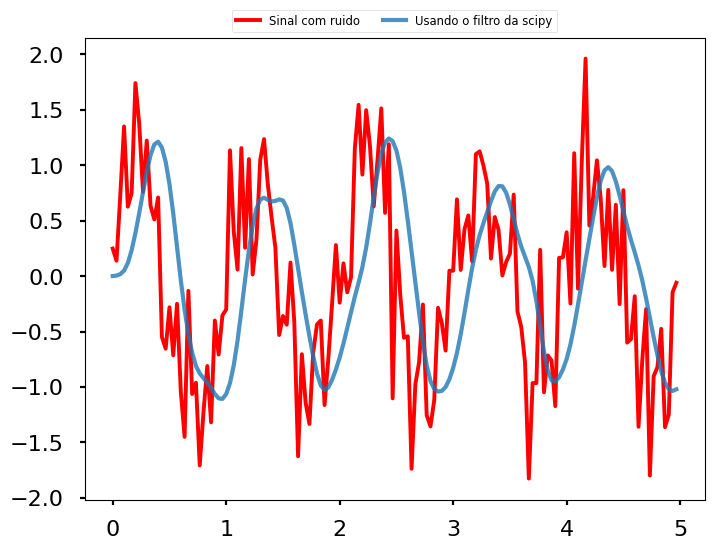

In [29]:
plt.figure(figsize = (8, 6))
plt.plot(ts, yraw, 'r', label = 'Sinal com ruido')
plt.plot(ts, y_lfilter, alpha=0.8, lw=3, label="Usando o filtro da scipy")
plt.legend(loc="lower center", bbox_to_anchor=[0.5, 1],
           ncol=2, fontsize="smaller")
plt.show()